In [3]:
!pip install folktables
!pip install matplotlib seaborn
!pip install xgboost
!pip install scikit-learn


  Using cached folktables-0.0.12-py3-none-any.whl.metadata (533 bytes)
  Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached folktables-0.0.12-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/64.8 kB ? eta -:--:--
   ---------------------------------------- 64.8/64.8 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.7 MB 9.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.7 MB 8.5 MB/s eta 0:00:02
   ----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.7 kB ? eta -:--:--
     ------ ------------------------------ 20.5/108.7 kB 165.2 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/108.7 kB 281.8 kB/s eta 0:00:01
     --------------------------------- -- 102.4/108.7 kB 590.8 kB/s eta 0:00:01
     ------------------------------------ 108.7/108.7 kB 572.7 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-c


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sys
sys.path.append(r'IRonPy-master')
from iron import phi


In [ ]:
# calling a function from phi.py on an example
phi.phi_control([1.2, 2.3, 3.5, 4.0, 5.1]) 


{'method': 'extremes',
 'npts': 3,
 'control_pts': [np.float64(-2.0690906474781485),
  1,
  0,
  np.float64(3.5),
  0,
  0,
  np.float64(5.243766954580931),
  1,
  0]}

# Data Analysis

In [81]:
import pandas as pd

# Define the file path
file_path = r"data/adult_reconstruction.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   hours-per-week  age  capital-gain  capital-loss workclass     education  \
0              20   40             0             0   Private     Bachelors   
1              40   21             0             0   Private  Some-college   
2              10   17             0             0   Private          11th   
3              50   51             0             0   Private       HS-grad   
4              38   28             0             0   Private     Bachelors   

   education-num      marital-status   relationship                race  \
0             13  Married-civ-spouse           Wife               White   
1             10            Divorced      Own-child               White   
2              7       Never-married      Own-child               White   
3              9  Married-civ-spouse        Husband  Asian-Pac-Islander   
4             13       Never-married  Not-in-family               White   

   gender native-country  income       occupation  
0  Female  United-States   4

In [82]:
print(df.info())              # Data types & non-null counts
print(df.isnull().sum())      # Total missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49531 entries, 0 to 49530
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours-per-week  49531 non-null  int64 
 1   age             49531 non-null  int64 
 2   capital-gain    49531 non-null  int64 
 3   capital-loss    49531 non-null  int64 
 4   workclass       49531 non-null  object
 5   education       49531 non-null  object
 6   education-num   49531 non-null  int64 
 7   marital-status  49531 non-null  object
 8   relationship    49531 non-null  object
 9   race            49531 non-null  object
 10  gender          49531 non-null  object
 11  native-country  49531 non-null  object
 12  income          49531 non-null  int64 
 13  occupation      49531 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.3+ MB
None
hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-nu

In [10]:
for column in df.columns:
    print(f"\n--- {column} ---")
    print(df[column].unique())



--- hours-per-week ---
[20 40 10 50 38 99 24 45 42 30 32 60 35 52 37 36 70 12 55 15 17 80 43 65
 39  4 49 48 18 28 22 56 25 44 68  8  5 14  2 16 64 75 87 47 33 90 84 46
 13  7 19 51 41 59 21 57 27 98 54 11 34 66  6 92  3 72 58 62  9  1 26 53
 78 23 67 85 61 63 31 29 73 77 97 76 96 81 88 94 91 95 74 86 89 79 69 82]

--- age ---
[40 21 17 51 28 26 44 81 45 37 24 29 33 23 59 56 41 38 35 34 43 22 30 27
 50 48 25 46 32 62 20 53 52 39 47 18 68 57 42 36 64 19 49 54 31 61 78 70
 58 87 55 73 75 65 63 60 66 72 71 69 77 90 67 76 74 83 80 79 85 84 82 89
 88 86]

--- capital-gain ---
[    0  2354 15024 14084  7688  4064  7298  1055  4386  2176  3781  3103
  5178   594  3137  3464  6418  2885  2653  5013  3411  2597 10566  2964
  2174  4865  4787  4650 25236  3908  9386  3456  2346  6849  6767  3674
  2202  8614  1506  2907  2463  2290 99999  2635  6360  1424 20051 15020
 10520  3325  3818   114  1471 14344 27828  2829  4508  5721  2228  2329
  1639  2050 13550  4101  4416  4934  1797  6497  1086  

## Dropping missing values

In [83]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df = df.dropna()
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 45849 entries, 0 to 49530
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours-per-week  45849 non-null  int64 
 1   age             45849 non-null  int64 
 2   capital-gain    45849 non-null  int64 
 3   capital-loss    45849 non-null  int64 
 4   workclass       45849 non-null  object
 5   education       45849 non-null  object
 6   education-num   45849 non-null  int64 
 7   marital-status  45849 non-null  object
 8   relationship    45849 non-null  object
 9   race            45849 non-null  object
 10  gender          45849 non-null  object
 11  native-country  45849 non-null  object
 12  income          45849 non-null  int64 
 13  occupation      45849 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num    

## Plotting Countries Count

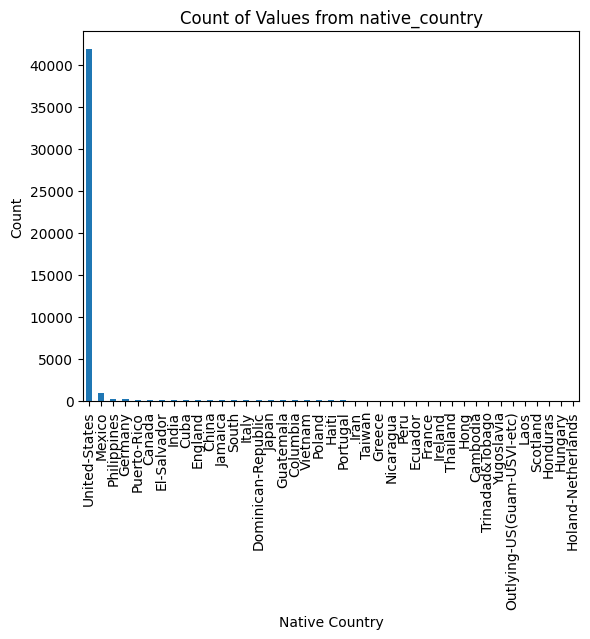

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assuming df is your DataFrame
df['native-country'].value_counts().plot(kind='bar')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Count of Values from native_country')
plt.show()

## Plotting Categorical Values Counts

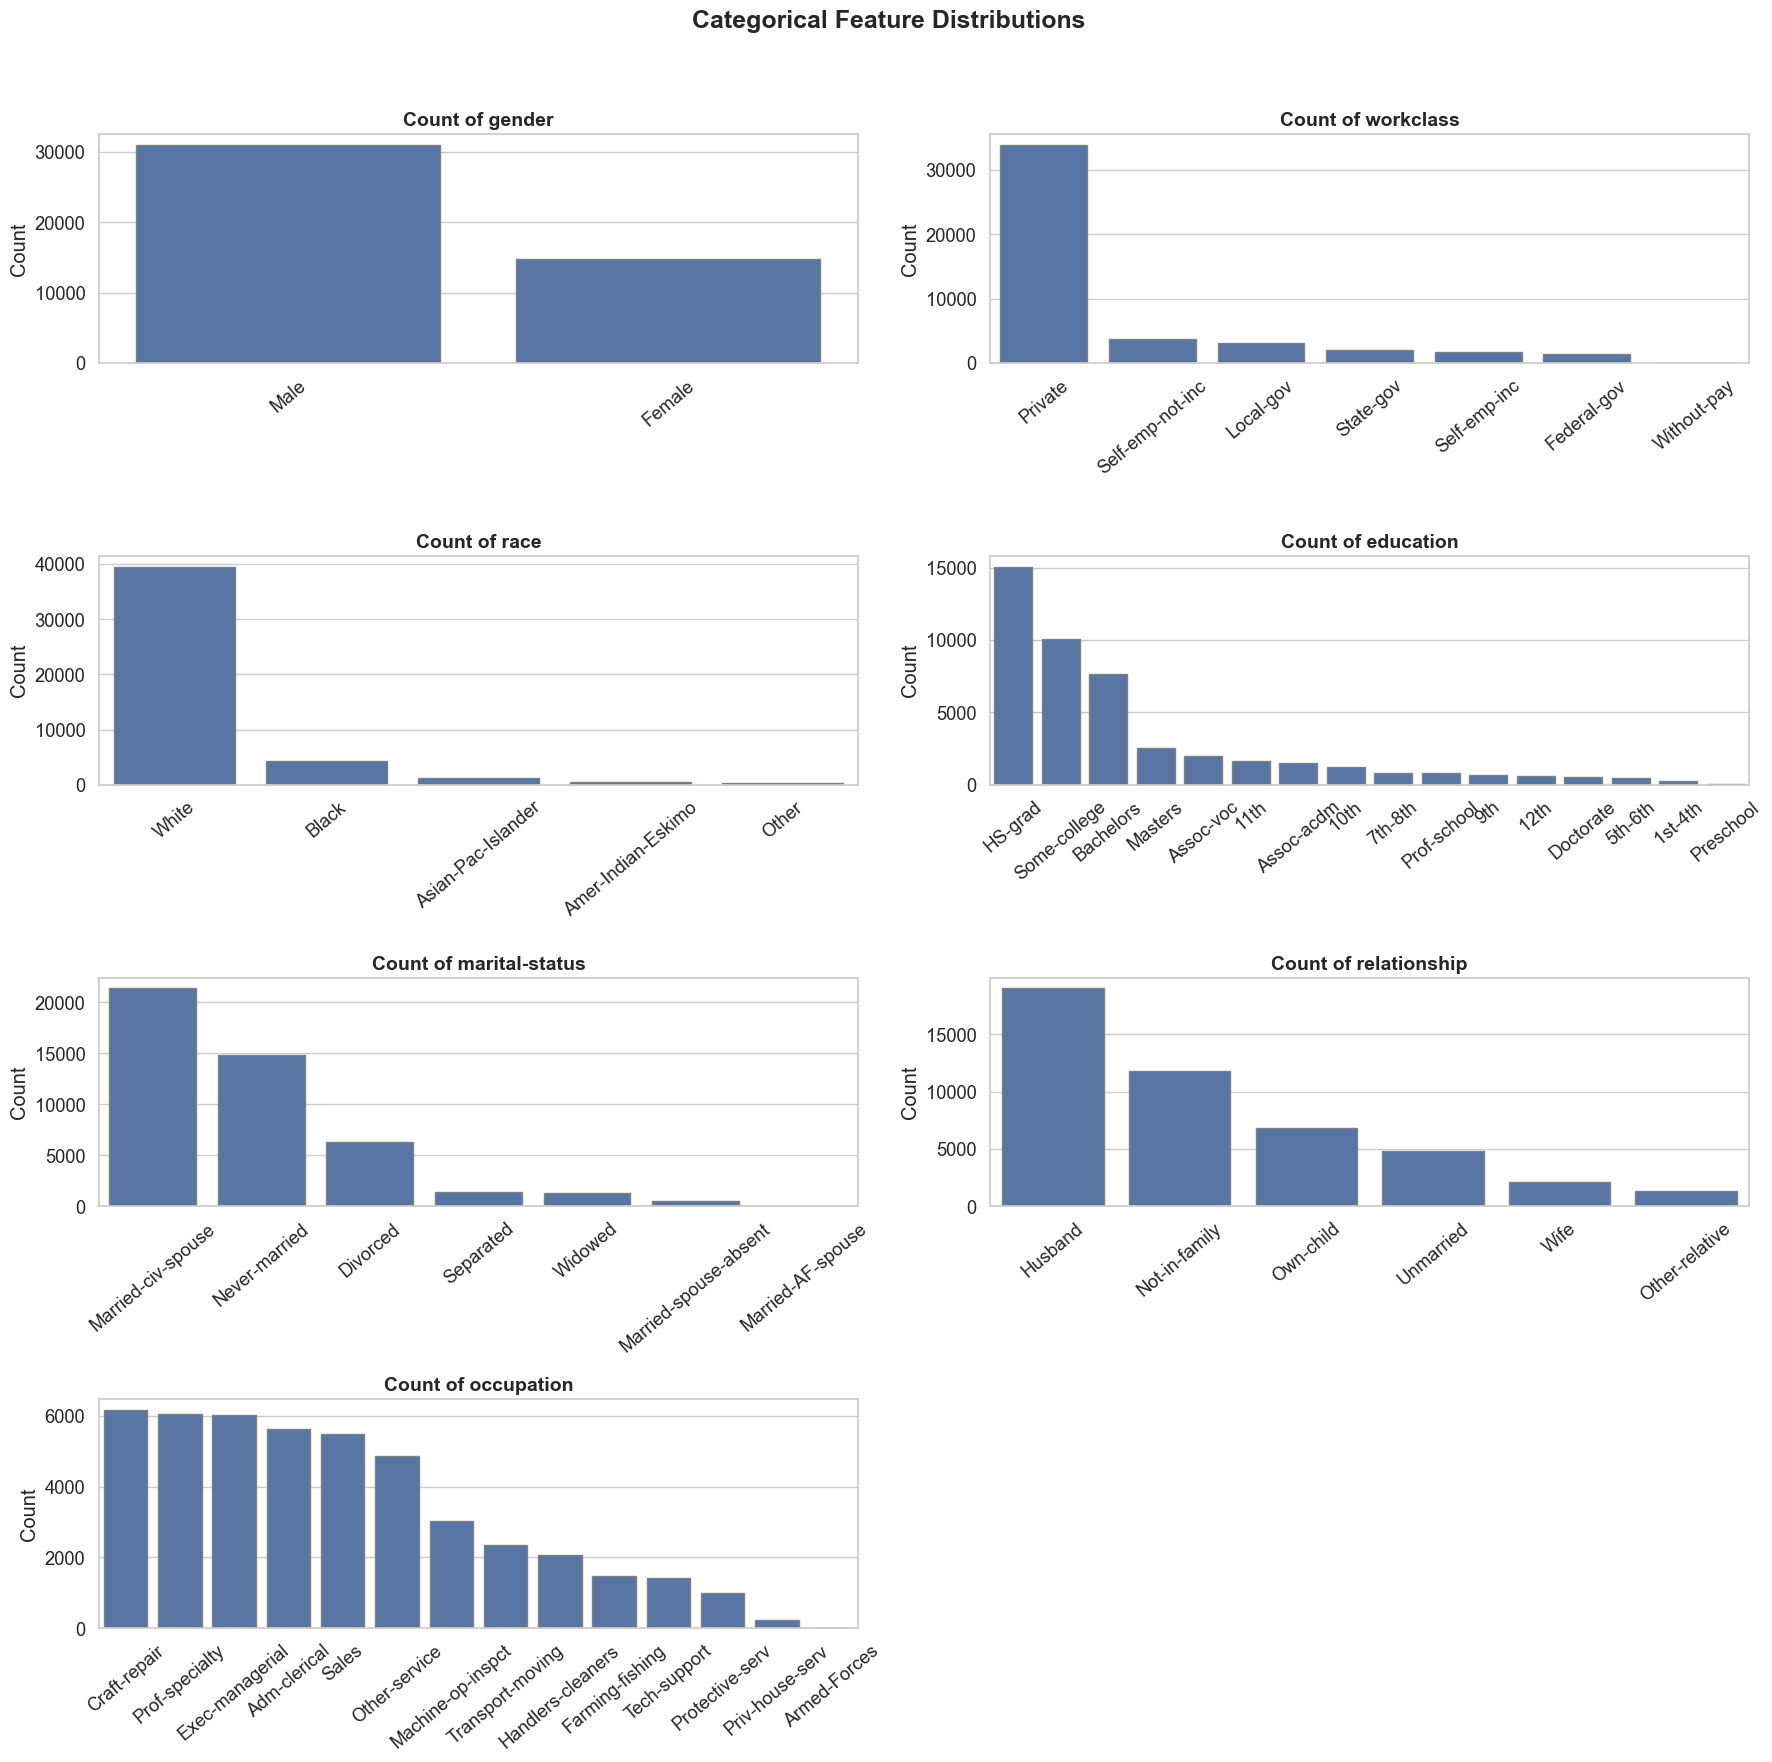

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn theme
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = ['gender', 'workclass', 'race','education', 'marital-status', 'relationship', 'occupation']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4.5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i],
                  order=df[col].value_counts().index,
                  edgecolor='gray')
    axes[i].set_title(f'Count of {(col)}', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the super title
plt.show()


## Mapping cat. features (Dropped idea)

In [88]:
mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Private',
    'Self-emp-inc': 'Private',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
    '?': 'Unknown'
}
education_mapping = {
    'Doctorate': 'Graduate',
    'Masters': 'Graduate',
    'Prof-school': 'Graduate',
    'Bachelors': 'College',
    'Some-college': 'College',
    'Assoc-acdm': 'College',
    'Assoc-voc': 'College',
    'HS-grad': 'High School',
    '12th': 'High School',
    '11th': 'Less than High School',
    '10th': 'Less than High School',
    '9th': 'Less than High School',
    '7th-8th': 'Less than High School',
    '5th-6th': 'Less than High School',
    '1st-4th': 'Less than High School',
    'Preschool': 'Less than High School'
}
marital_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Never Married',
    'Divorced': 'Separated/Divorced',
    'Separated': 'Separated/Divorced',
    'Widowed': 'Widowed'
}
continent_mapping = {
    # North America
    'United-States': 'North America',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Mexico': 'North America',

    # Central & South America
    'Honduras': 'Central & South America',
    'Jamaica': 'Central & South America',
    'Dominican-Republic': 'Central & South America',
    'Ecuador': 'Central & South America',
    'Columbia': 'Central & South America',
    'Guatemala': 'Central & South America',
    'Nicaragua': 'Central & South America',
    'El-Salvador': 'Central & South America',
    'Trinadad&Tobago': 'Central & South America',
    'Peru': 'Central & South America',
    'Haiti': 'Central & South America',
    'Cuba': 'Central & South America',

    # Asia
    'Laos': 'Asia',
    'Cambodia': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Hong': 'Asia',
    'Laos': 'Asia',

    # Europe
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Hungary': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',

    # Unknown/Other
    '?': 'Unknown',
    'South': 'Unknown'  # unclear value
}

relationship_mapping = {
    'Wife': 'Married',
    'Husband': 'Married',
    'Own-child': 'Child',
    'Other-relative': 'Other-relative',
    'Not-in-family': 'Not-in-family',
    'Unmarried': 'Unmarried'
}

# Workclass privilege
privilege_workclass = {
    'Private': 'Not Privileged Workclass',
    'Government': 'Privileged Workclass',
    'Unemployed': 'Not Privileged Workclass',
    'Unknown': 'Unknown Workclass'
}

# Education privilege
privilege_education = {
    'Graduate': 'Privileged Education',
    'College': 'Privileged Education',
    'High School': 'Not Privileged Education',
    'Less than High School': 'Not Privileged Education'
}

# Marital privilege
privilege_marital = {
    'Married': 'Privileged Marital',
    'Never Married': 'Not Privileged Marital',
    'Separated/Divorced': 'Not Privileged Marital',
    'Widowed': 'Not Privileged Marital'
}

# Relationship privilege
privilege_relationship = {
    'Married': 'Privileged Relationship',
    'Child': 'Not Privileged Relationship',
    'Not-in-family': 'Not Privileged Relationship',
    'Unmarried': 'Not Privileged Relationship',
    'Other-relative': 'Not Privileged Relationship'
}

# Gender privilege
privilege_gender = {
    'Male': 'Privileged Gender',
    'Female': 'Not Privileged Gender'
}

# Race privilege
privilege_race = {
    'White': 'Privileged Race'
    # All others will be filled as Not Privileged Race
}

# Country
privilege_country = {
    # Privileged (mostly Western nations)
    'United-States': 'Privileged Country',
    'Canada': 'Privileged Country',
    'England': 'Privileged Country',
    'Germany': 'Privileged Country',
    'France': 'Privileged Country',
    'Ireland': 'Privileged Country',
    'Scotland': 'Privileged Country',
    'Holand-Netherlands': 'Privileged Country',
    'Greece': 'Privileged Country',
    'Italy': 'Privileged Country',
    'Poland': 'Privileged Country',
    'Portugal': 'Privileged Country',
    'Hungary': 'Privileged Country',

    # Not Privileged (Global South and developing regions)
    'Mexico': 'Not Privileged Country',
    'Puerto-Rico': 'Not Privileged Country',
    'Outlying-US(Guam-USVI-etc)': 'Not Privileged Country',
    'Honduras': 'Not Privileged Country',
    'Jamaica': 'Not Privileged Country',
    'Dominican-Republic': 'Not Privileged Country',
    'Ecuador': 'Not Privileged Country',
    'Columbia': 'Not Privileged Country',
    'Guatemala': 'Not Privileged Country',
    'Nicaragua': 'Not Privileged Country',
    'El-Salvador': 'Not Privileged Country',
    'Trinadad&Tobago': 'Not Privileged Country',
    'Peru': 'Not Privileged Country',
    'Haiti': 'Not Privileged Country',
    'Cuba': 'Not Privileged Country',
    'Laos': 'Not Privileged Country',
    'Cambodia': 'Not Privileged Country',
    'India': 'Not Privileged Country',
    'Japan': 'Not Privileged Country',
    'China': 'Not Privileged Country',
    'Iran': 'Not Privileged Country',
    'Philippines': 'Not Privileged Country',
    'Vietnam': 'Not Privileged Country',
    'Taiwan': 'Not Privileged Country',
    'Thailand': 'Not Privileged Country',
    'Hong': 'Not Privileged Country',
    'Yugoslavia': 'Not Privileged Country',
    'South': 'Not Privileged Country'
}


Mapping Country to GDP
sources:

https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD
https://en.wikipedia.org/wiki/Economy_of_the_Socialist_Federal_Republic_of_Yugoslavia#GDP_per_capita_of_republics_and_autonomous_provinces
https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=CU

In [89]:
'''
import pandas as pd
import numpy as np

# we use the per country csv as GDP data for the mapping
gdp_per_country = pd.read_csv("GDP-per-Country.csv", na_values="no data")
gdp_per_country.rename(columns={gdp_per_country.columns[0]: 'Country'}, inplace=True)
gdp_per_country['2025'] = pd.to_numeric(gdp_per_country['2025'], errors='coerce')

native_countries = df['native-country'].unique()
gdp_2025_by_country = {}

# We do a mapping to account for the differences in names btwn the datasets (IMF and adult)
country_name_mapping = {
    'United-States': 'United States',
    'England': 'United Kingdom',
    'Puerto-Rico': 'Puerto Rico',
    'Outlying-US(Guam-USVI-etc)': 'United States',
    'South': 'South Africa',
    'China': "China, People's Republic of",
    'Laos': 'Lao P.D.R.',
    'Columbia': 'Colombia',
    'Taiwan': 'Taiwan Province of China',
    'Dominican-Republic': 'Dominican Republic',
    'Scotland': 'United Kingdom',
    'Yugoslavia': None,
    'El-Salvador': 'El Salvador',
    'Trinadad&Tobago': 'Trinidad and Tobago',
    'Hong': 'Hong Kong SAR',
    'Holand-Netherlands': 'Netherlands'
}

gdp_2025_by_country = {}
gdp_per_country['Country'] = gdp_per_country['Country'].str.strip()

for native in native_countries:
    # get mapped name or fall back to native
    gdp_country = country_name_mapping.get(native, native)

    # Step 2: Try to match if we have a name
    if gdp_country:
        match = gdp_per_country[gdp_per_country['Country'].str.lower() == gdp_country.lower()]
        gdp_2025_by_country[native] = match['2025'].values[0] if not match.empty else np.nan
    else:
        gdp_2025_by_country[native] = np.nan

# Manual overrides, since they are not in IMF set
gdp_2025_by_country['Yugoslavia'] = np.float64(5464)
gdp_2025_by_country['Cuba'] = np.float64(9605)
gdp_2025_by_country['Columbia'] = np.float64(8054)

gdp_df = pd.DataFrame.from_dict(gdp_2025_by_country, orient='index', columns=['GDP_2025'])
gdp_df_nonan = gdp_df.dropna().copy()

# Create quantile-based classes (so 0 is poor, 4 is rich)
gdp_df_nonan.loc[:, 'gdp_class'] = pd.qcut(gdp_df_nonan['GDP_2025'], q=5, labels=[0, 1, 2, 3, 4]).astype(int)
gdp_df = gdp_df.join(gdp_df_nonan['gdp_class'])

# Merge the gdp_class column from gdp_df into the main df
# We need to reset the index of gdp_df to merge on the country name
if 'GDP_2025' not in df:
  df = df.merge(gdp_df.reset_index().rename(columns={'index': 'native-country'}),
                on='native-country',
                how='left')

## BELOW is optional, to split it into priviliged and unprivileged
gdp_df = pd.DataFrame.from_dict(gdp_2025_by_country, orient='index', columns=['GDP_2025'])
gdp_df_sorted = gdp_df.dropna().sort_values('GDP_2025')
midpoint = len(gdp_df_sorted) // 2
gdp_df_sorted['privilege'] = ['Not Privileged Country'] * midpoint + ['Privileged Country'] * (len(gdp_df_sorted) - midpoint)
privilege_country = gdp_df_sorted['privilege'].to_dict()
df['country_privilege'] = df['native-country'].map(privilege_country).fillna('Not Privileged Country')
'''

'\nimport pandas as pd\nimport numpy as np\n\n# we use the per country csv as GDP data for the mapping\ngdp_per_country = pd.read_csv("GDP-per-Country.csv", na_values="no data")\ngdp_per_country.rename(columns={gdp_per_country.columns[0]: \'Country\'}, inplace=True)\ngdp_per_country[\'2025\'] = pd.to_numeric(gdp_per_country[\'2025\'], errors=\'coerce\')\n\nnative_countries = df[\'native-country\'].unique()\ngdp_2025_by_country = {}\n\n# We do a mapping to account for the differences in names btwn the datasets (IMF and adult)\ncountry_name_mapping = {\n    \'United-States\': \'United States\',\n    \'England\': \'United Kingdom\',\n    \'Puerto-Rico\': \'Puerto Rico\',\n    \'Outlying-US(Guam-USVI-etc)\': \'United States\',\n    \'South\': \'South Africa\',\n    \'China\': "China, People\'s Republic of",\n    \'Laos\': \'Lao P.D.R.\',\n    \'Columbia\': \'Colombia\',\n    \'Taiwan\': \'Taiwan Province of China\',\n    \'Dominican-Republic\': \'Dominican Republic\',\n    \'Scotland\': \'

## Plotting numerical values

### Plots for gender

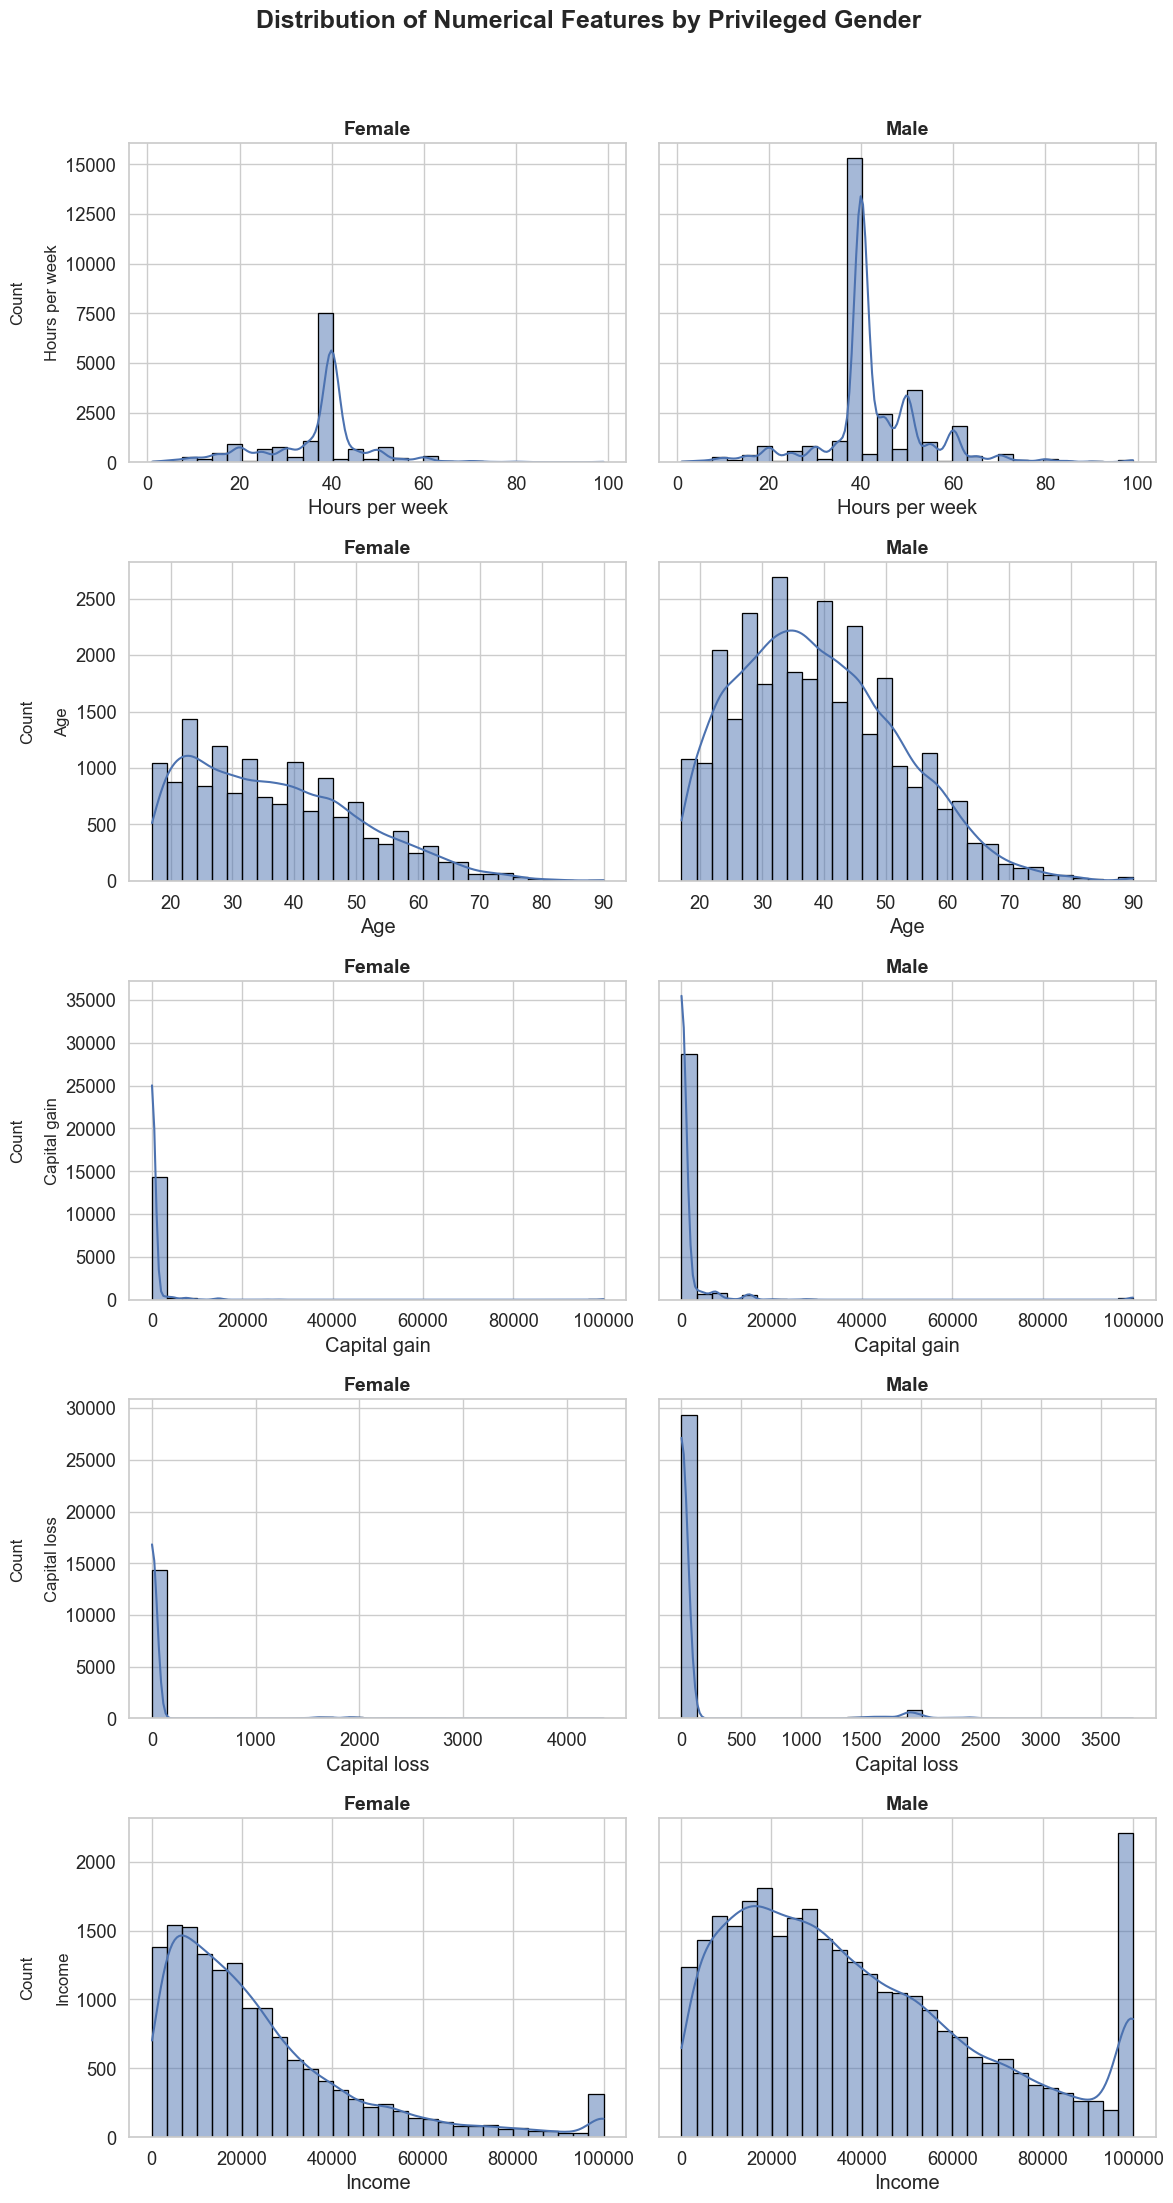

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'income']
genders = df['gender'].unique()

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, len(genders), figsize=(len(genders)*6, rows*4.5), sharey='row')

for i, col in enumerate(num_cols):
    for j, gender in enumerate(genders):
        ax = axes[i, j] if len(genders) > 1 else axes[i]
        subset = df[df['gender'] == gender]

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=30,
            ax=ax,
            edgecolor='black'
        )

        ax.set_title(f'{gender}', fontsize=14, weight='bold')
        if j == 0:
            ax.set_ylabel(f'Count\n\n{col.replace("-", " ").capitalize()}', fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xlabel(col.replace("-", " ").capitalize())


plt.suptitle("Distribution of Numerical Features by Privileged Gender", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Plots for race

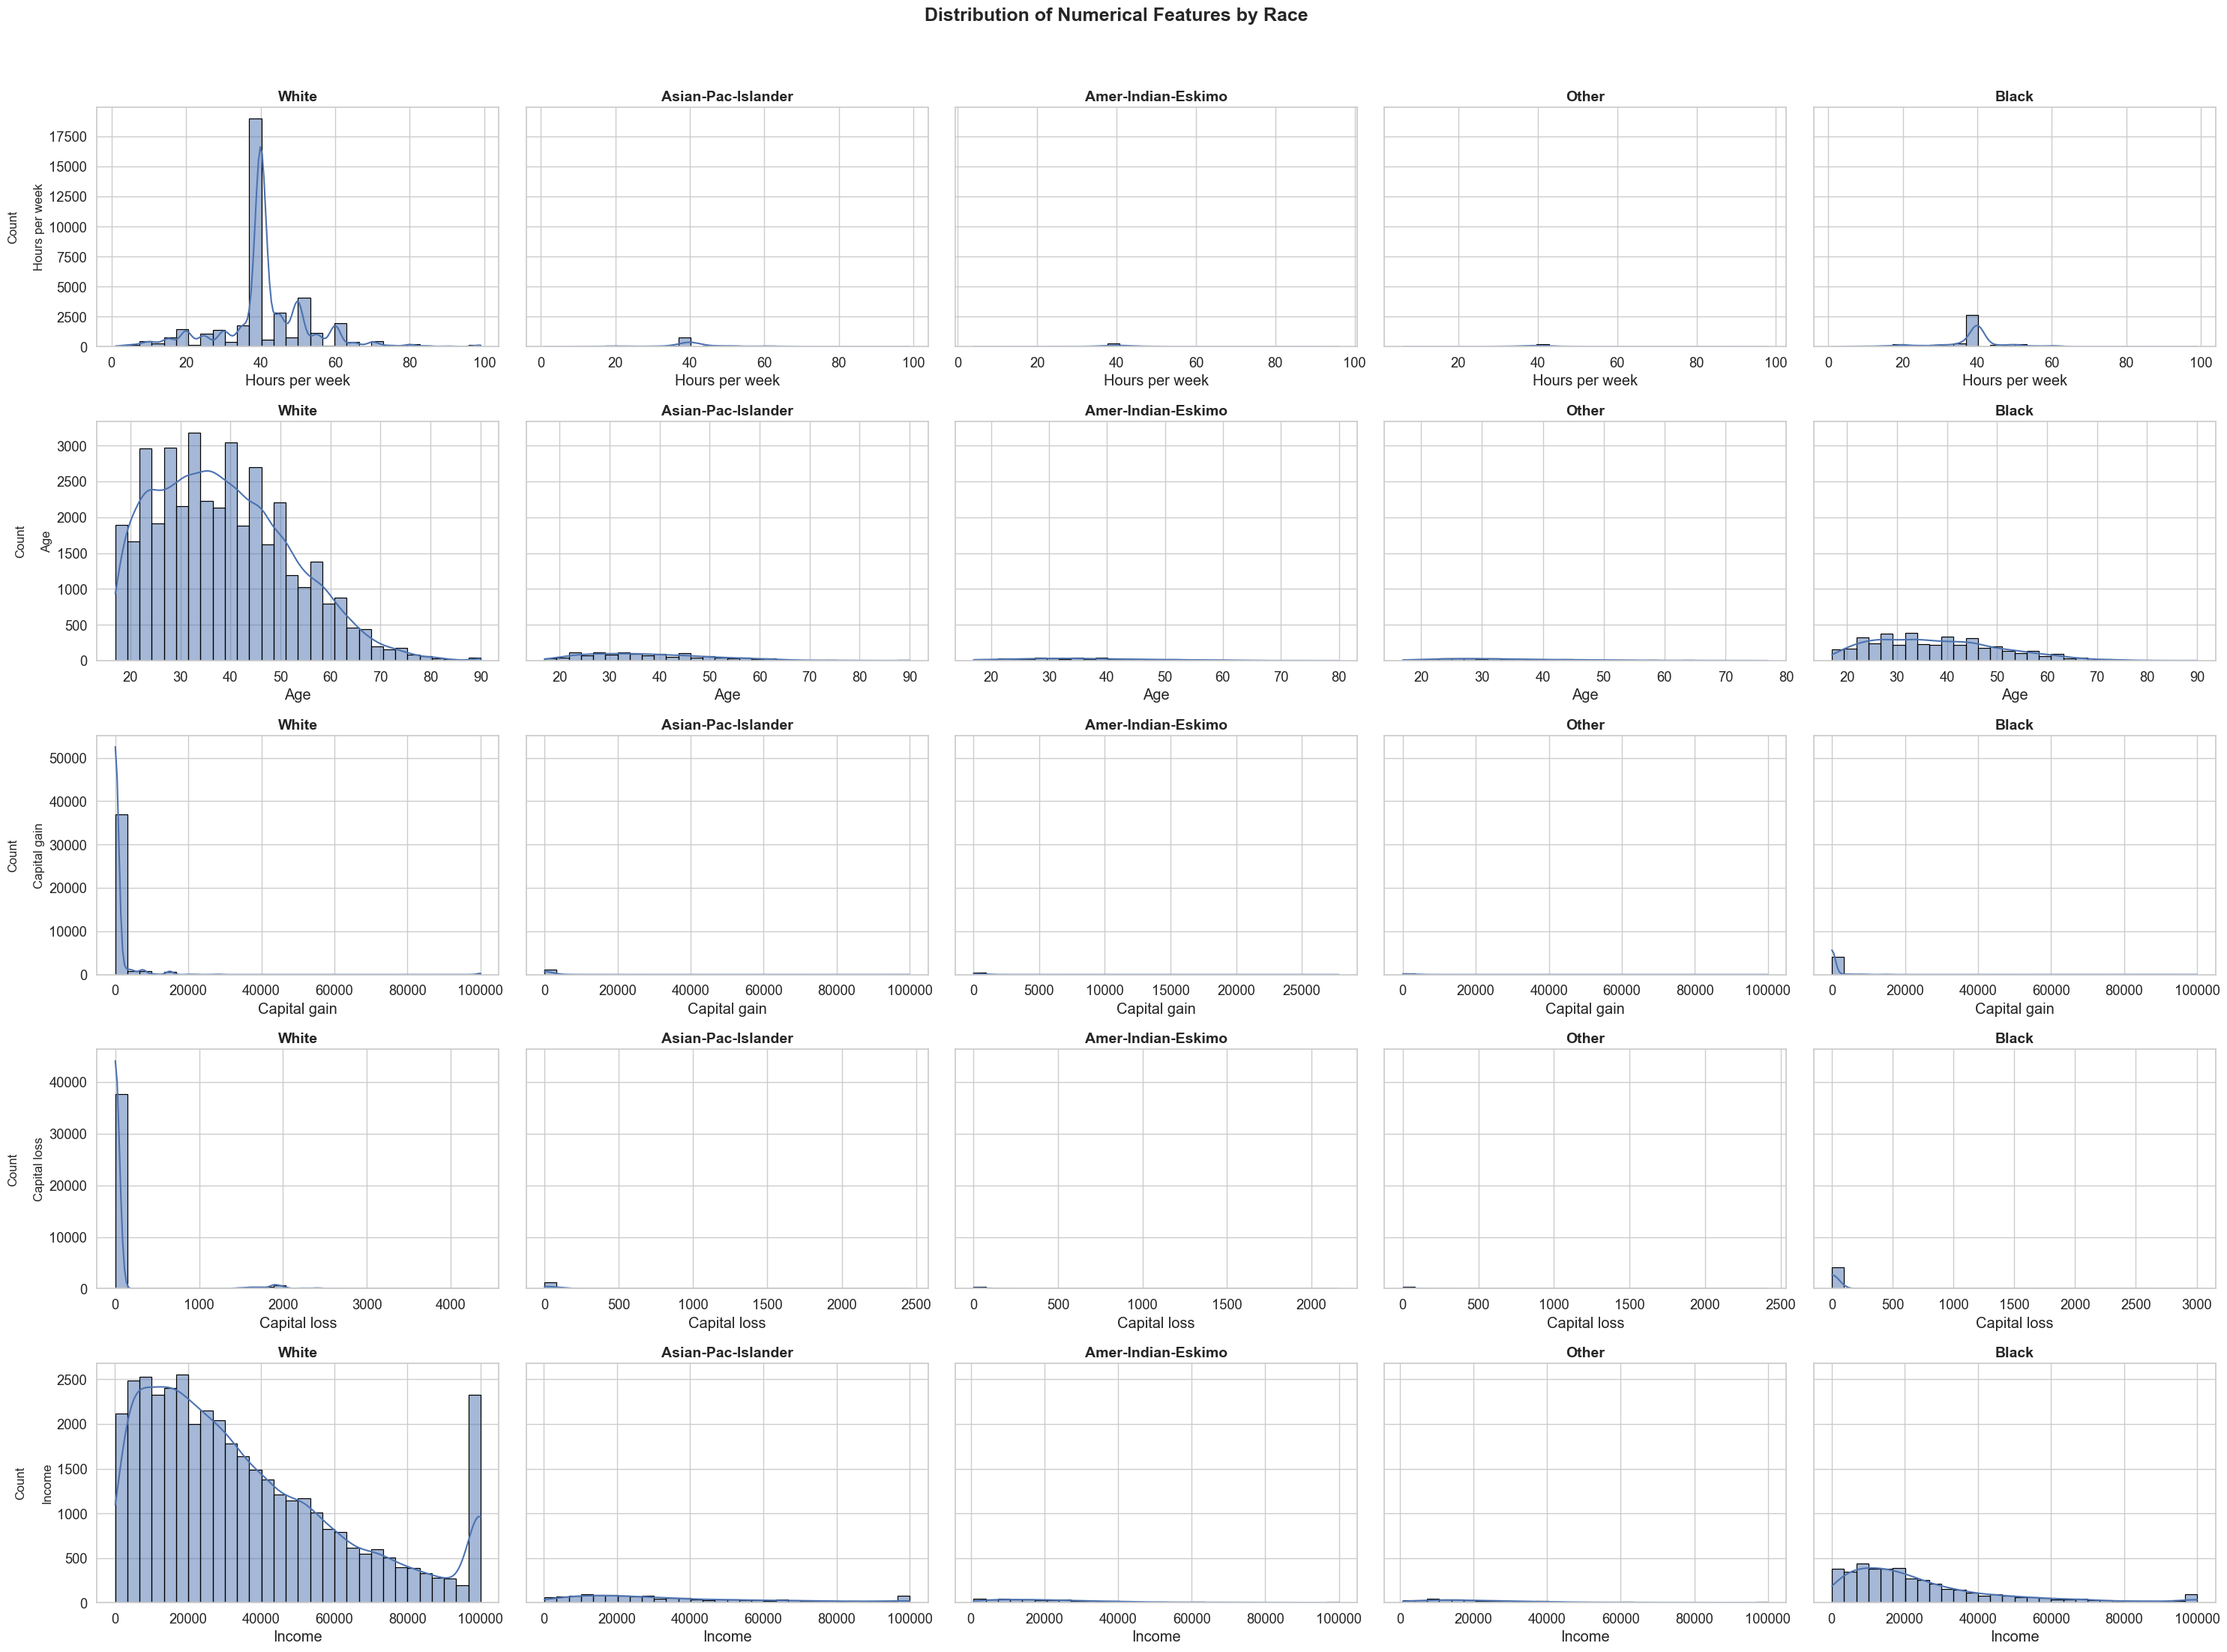

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'income']
races = df['race'].unique()

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, len(races), figsize=(len(races)*6, rows*4.5), sharey='row')

for i, col in enumerate(num_cols):
    for j, race in enumerate(races):
        ax = axes[i, j] if len(races) > 1 else axes[i]
        subset = df[df['race'] == race]

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=30,
            ax=ax,
            edgecolor='black'
        )

        ax.set_title(f'{race}', fontsize=14, weight='bold')
        if j == 0:
            ax.set_ylabel(f'Count\n\n{col.replace("-", " ").capitalize()}', fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xlabel(col.replace("-", " ").capitalize())

plt.suptitle("Distribution of Numerical Features by Race", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Baseline model > Running time

In [2]:
import pandas as pd

file_path = r"data/adult_reconstruction.csv"

df_train = pd.read_csv(file_path)

print(df_train.head())



   hours-per-week  age  capital-gain  capital-loss workclass     education  \
0              20   40             0             0   Private     Bachelors   
1              40   21             0             0   Private  Some-college   
2              10   17             0             0   Private          11th   
3              50   51             0             0   Private       HS-grad   
4              38   28             0             0   Private     Bachelors   

   education-num      marital-status   relationship                race  \
0             13  Married-civ-spouse           Wife               White   
1             10            Divorced      Own-child               White   
2              7       Never-married      Own-child               White   
3              9  Married-civ-spouse        Husband  Asian-Pac-Islander   
4             13       Never-married  Not-in-family               White   

   gender native-country  income       occupation  
0  Female  United-States   4

In [11]:
# 1. Drop rows with missing values in
df_train_clean = df_train.dropna()

# 2. Filter for native-country == United-States in df_train_clean
df_train_us = df_train_clean[df_train_clean['native-country'] == 'United-States']

# 3. Drop education-num column (we hot-encode it with education column)
df_train_us = df_train_us.drop(columns=['education-num'])

# 4. List categorical columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'relationship',
                    'race', 'gender', 'native-country', 'occupation']

# 5. One-hot encode categorical columns
df_train_encoded = pd.get_dummies(df_train_us, columns=categorical_cols, drop_first=True)

df_train_sampled = df_train_encoded.sample(n=7000, random_state=42)


## READY TO TRAIN!! 

X = df_train_sampled.drop(columns=['income'])
y = df_train_sampled['income']


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import importlib
import IDLoss
importlib.reload(IDLoss)
from IDLoss import id_loss
import sys
import time  # For timing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
sys.path.append(r'IRonPy-master')
from iron import phi

# Your protected attributes
prot_attrs = [col for col in X_train.columns if col.startswith('race_') or col.startswith('gender_')]

# Convert y to float64
y_train_float = np.array(y_train, dtype=np.float64)

# Initialize phi control object and compute phis
ph = phi.phi_control(pd.Series(y_train_float))
phis = np.array(phi.phi(pd.Series(y_train_float), ph), dtype=np.float64)

# Create the IDLoss objective function
loss = id_loss(ph, X_train, prot_attrs, approx=False)

# Initialize the model
model = xgb.XGBRegressor(
    objective=loss,
    n_estimators=30,
    max_depth=3,
    learning_rate=0.2,
    random_state=42,
    n_jobs=-1
)

# Start timing
start_time = time.time()

# Fit the model
model.fit(X_train, y_train)

#  End timing
end_time = time.time()
print(f" Training time: {end_time - start_time:.2f} seconds")

# Predict
y_pred = model.predict(X_val)

#  Evaluation
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Evaluation Metrics:")
print(f"• MSE:  {mse:.4f}")
print(f"• MAE:  {mae:.4f}")
print(f"• R²:   {r2:.4f}")

# Optional: View some predictions
print("\n Sample predictions:", y_pred[:10])


⏱️ Training time: 156.57 seconds
🔍 Evaluation Metrics:
• MSE:  569142400.0000
• MAE:  18039.4062
• R²:   0.1631

📌 Sample predictions: [17612.582     572.26166 57327.99    19482.049    7265.1406  61884.676
 10141.82    16249.424   68639.87    72916.06   ]


Results in runtime for baseline model on randomly sampled subset from the whole dataset (the dataset just with United States)

| Sample Size | Model Type   | IDLoss | n\_estimators | max\_depth | learning\_rate | Train Time (s) |
| ----------- | ------------ | ------ | ------------- | ---------- | -------------- | -------------- |
| 5,000       | XGBRegressor | yes      | 30            | 3          | 0.2            | 137.28         |
| 10,000      |  XGBRegressor | yes      | 30            | 3          | 0.2            |325.01         |
| 2,000       |  XGBRegressor | yes      | 30            | 3          | 0.2            |      37.96     |
| 7,000            |   XGBRegressor | yes      | 30            | 3          | 0.2          |  156.57           |


# Stratified sample size (based on gender, race and income)

In [64]:
df = pd.read_csv(file_path)
df_og = pd.read_csv(file_path)

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Filter dataset to United-States
df = df[df['native-country'] == 'United-States'].copy()

# Drop rows with missing values
df = df.dropna()

# Create combined sensitive attribute column
df['race_gender'] = df['race'] + "_" + df['gender']

# Bin income for stratification
df['income_bin'] = pd.qcut(df['income'], q=4, labels=False)

# Combine sensitive and label bins for stratification
df['stratify_col'] = df['race'] + "_" + df['gender'] + "_" + df['income_bin'].astype(str)

# Sample 7000 rows stratified by combined column
df_sample, _ = train_test_split(
    df, 
    train_size=7000, 
    stratify=df['stratify_col'], 
    random_state=42
)

# Drop helper columns
df_sample = df_sample.drop(columns=['race_gender', 'income_bin', 'stratify_col'])


In [66]:
df_sample.to_csv("sampled_data_7000.csv", index=False)


In [73]:
df_sample.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
28885,26,17,0,0,Private,9th,5,Never-married,Own-child,Black,Male,United-States,2515,Other-service
42182,40,47,0,1977,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Husband,White,Male,United-States,99999,Craft-repair
38771,42,48,0,0,Private,Assoc-acdm,12,Divorced,Unmarried,White,Female,United-States,18045,Exec-managerial
38325,40,25,0,0,State-gov,Some-college,10,Married-civ-spouse,Husband,White,Male,United-States,22412,Protective-serv
19050,40,45,0,0,State-gov,Some-college,10,Never-married,Not-in-family,White,Female,United-States,30100,Adm-clerical


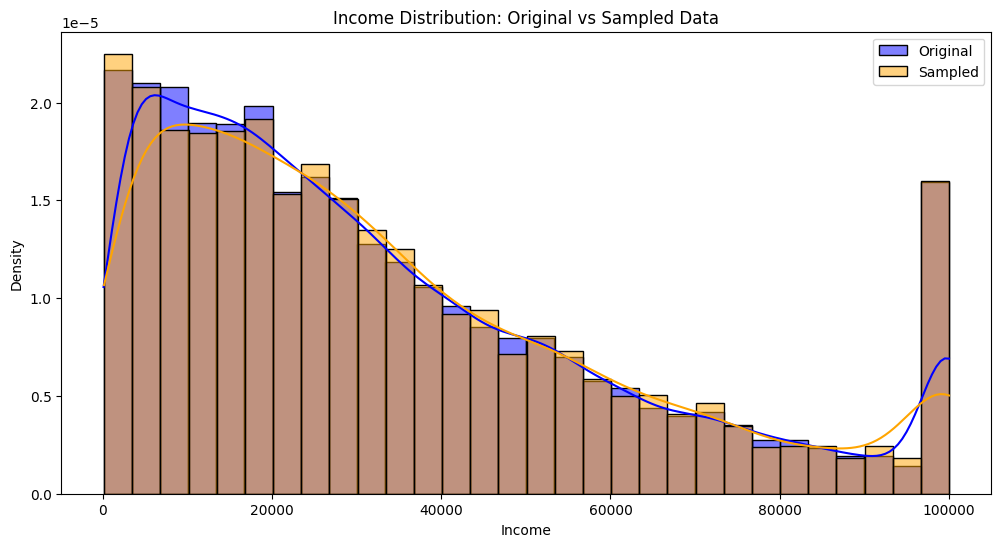

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(df_og['income'], color='blue', label='Original', stat='density', kde=True, bins=30, alpha=0.5)
sns.histplot(df_sample['income'], color='orange', label='Sampled', stat='density', kde=True, bins=30, alpha=0.5)

plt.title('Income Distribution: Original vs Sampled Data')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()


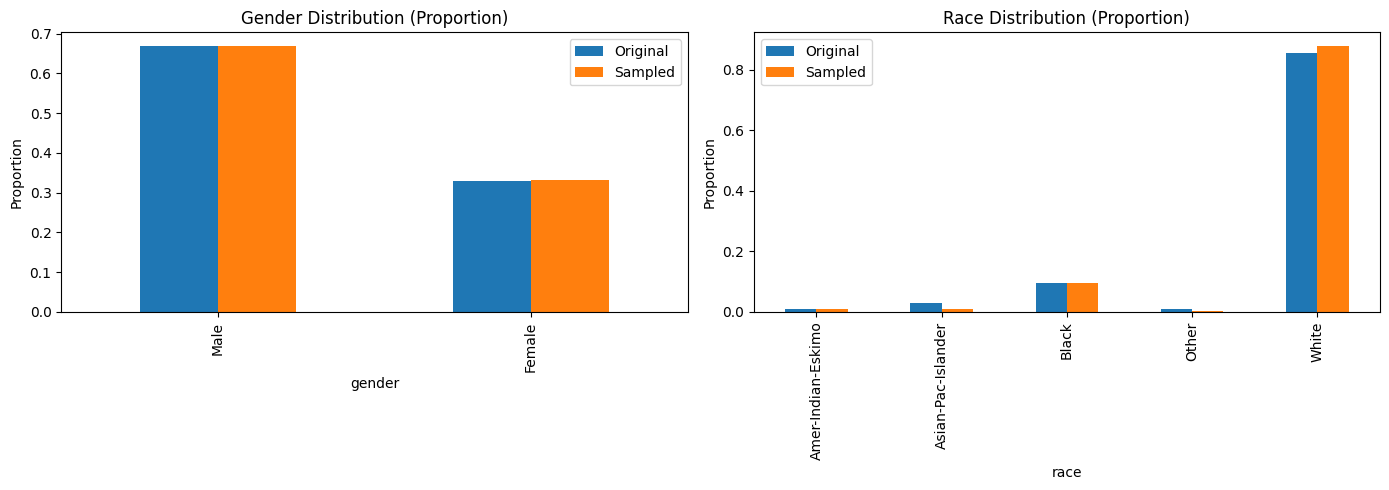

Gender distribution:
         Original  Sampled
gender                   
Male    0.669762    0.668
Female  0.330238    0.332

Race distribution:
                     Original   Sampled
race                                  
Amer-Indian-Eskimo  0.009509  0.010000
Asian-Pac-Islander  0.030668  0.009571
Black               0.094769  0.096286
Other               0.008197  0.004429
White               0.856857  0.879714


In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_orig = df_og['gender'].value_counts(normalize=True)
gender_sample = df_sample['gender'].value_counts(normalize=True)
gender_df = pd.DataFrame({'Original': gender_orig, 'Sampled': gender_sample}).fillna(0)

gender_df.plot(kind='bar', ax=axes[0], title='Gender Distribution (Proportion)')
axes[0].set_ylabel('Proportion')

race_orig = df_og['race'].value_counts(normalize=True)
race_sample = df_sample['race'].value_counts(normalize=True)
race_df = pd.DataFrame({'Original': race_orig, 'Sampled': race_sample}).fillna(0)

race_df.plot(kind='bar', ax=axes[1], title='Race Distribution (Proportion)')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

print("Gender distribution:\n", gender_df)
print("\nRace distribution:\n", race_df)


In [69]:
from scipy.stats import chi2_contingency

def chi_square_test(orig, sample, col_name):
    contingency = pd.concat([orig.value_counts(), sample.value_counts()], axis=1, keys=['Original', 'Sample'])
    contingency = contingency.fillna(0)
    stat, p, dof, expected = chi2_contingency(contingency.T)
    print(f"{col_name} Chi-square test p-value: {p:.4f}")
    if p > 0.05:
        print(f"{col_name} distributions are similar (fail to reject H0)")
    else:
        print(f"{col_name} distributions differ significantly (reject H0)")
    print()

chi_square_test(df_og['gender'], df_sample['gender'], 'Gender')
chi_square_test(df_og['race'], df_sample['race'], 'Race')


Gender Chi-square test p-value: 0.7796
Gender distributions are similar (fail to reject H0)

Race Chi-square test p-value: 0.0000
Race distributions differ significantly (reject H0)



The race when not White or Black has disprotportions in between original and sampled data, because there are few recrds of each. We can mention it in limitation of sampling!!! So we need to keep in mind that sample is representative fro White and Black

# Running baseline XGBoost model (MSE loss) with sampled data 

In [5]:
import pandas as pd

file_path2 = r"data/sampled_data_7000.csv"

df = pd.read_csv(file_path2)

In [6]:
df.head()
df = df.drop(columns=['education-num'])


In [7]:
# Basic stats for the income column
print("Income stats:")
print(df['income'].describe())

# Additional stats for more insight
print("\nAdditional income stats:")
print(f"Mean income: {df['income'].mean():,.2f}")
print(f"Median income: {df['income'].median():,.2f}")
print(f"Income std deviation: {df['income'].std():,.2f}")
print(f"Income min: {df['income'].min():,.2f}")
print(f"Income max: {df['income'].max():,.2f}")


Income stats:
count     7000.000000
mean     33949.380000
std      27172.527531
min        164.000000
25%      12454.250000
50%      26800.000000
75%      49062.500000
max      99999.000000
Name: income, dtype: float64

Additional income stats:
Mean income: 33,949.38
Median income: 26,800.00
Income std deviation: 27,172.53
Income min: 164.00
Income max: 99,999.00


In [8]:
import xgboost as xgb
import numpy as np
import pandas as pd
import importlib
import IDLoss
importlib.reload(IDLoss)
from IDLoss import id_loss
import sys
import time  # For timing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
sys.path.append(r'IRonPy-master')
from iron import phi
from baselines import run_fair_kernel_xgb
from sklearn.model_selection import train_test_split


#  List categorical columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'relationship',
                    'race', 'gender', 'native-country', 'occupation']

#  One-hot encode categorical columns
df_train_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_train_encoded.drop(columns=['income'])
y = df_train_encoded['income']

# Bin continuous target into quartiles for stratification
y_binned = pd.qcut(y, q=4, labels=False)

# Stratified train/val split using binned labels (to balance the income label in train&split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y_binned,
    random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
prot_attrs = [col for col in X_train.columns if col.startswith('race_') or col.startswith('gender_')]
## READY TO TRAIN!! 



In [9]:
import xgboost as xgb
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = xgb.XGBRegressor(
    objective='reg:squarederror',  # MSE loss
    n_estimators=int(round(100.63815164720133)),  
    max_depth=int(round(5.115433465800664)),      
    learning_rate=0.05897834027453615,
    subsample=0.5,
    colsample_bytree=0.6015324210597743,
    min_child_weight=int(round(5.803822670377714)), 
    gamma=3.358480813041507,
    reg_alpha=0.7256464399139014,
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1
)


start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")


y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Evaluation Metrics:")
print(f"• MSE:  {mse:.4f}")
print(f"• MAE:  {mae:.4f}")
print(f"• R²:   {r2:.4f}")

print("\nSample predictions:", y_pred[:10])


Training time: 0.14 seconds
Evaluation Metrics:
• MSE:  255884608.0000
• MAE:  11322.3633
• R²:   0.6484

Sample predictions: [58624.996  32068.566  41913.543   2868.5005 13082.537  24849.885
 34519.61   44744.16   15258.368  25224.217 ]


In [24]:
from iron import phi
y_val_reset = y_val.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred).reset_index(drop=True)
X_val_reset = X_val.reset_index(drop=True)

ph = phi.phi_control(y_val.astype(np.float64))

id_score = id(
    trues=y_val_reset,
    preds=y_pred_reset,
    X=X_val_reset,
    prot_attrs=prot_attrs,
    pl=True,
    ph=ph,
    return_errs=True
)



<ggplot: (640 x 480)>


In [25]:
seras = id_score['seras']  # dictionary of group-wise error rates

# For example, to average across all groups and thresholds:
avg_seras = {group: np.mean(sera['errors_normalized']) for group, sera in seras.items()}
print("Average normalized SERA per group:")
for group, avg in avg_seras.items():
    print(f"{group}: {avg:.4f}")


Average normalized SERA per group:
(): 17969040.9120
('gender_Male',): 225336542.6253
('race_Other',): 1384001.0408
('race_White',): 97636568.3685
('race_Asian-Pac-Islander',): 207312574.5993
('race_Black',): 87065737.4743
('race_White', 'gender_Male'): 264859902.0154
('race_Asian-Pac-Islander', 'gender_Male'): 143501424.0659
('race_Black', 'gender_Male'): 142242042.1825
('race_Asian-Pac-Islander', 'race_White'): 0.0000
('race_Other', 'gender_Male'): 1327110.6942
('race_Black', 'race_Other'): 0.0000
('race_Black', 'race_White'): 0.0000
('race_Asian-Pac-Islander', 'race_Other'): 0.0000
('race_Other', 'race_White'): 0.0000
('race_Asian-Pac-Islander', 'race_Black'): 0.0000
('race_Black', 'race_White', 'gender_Male'): 0.0000
('race_Asian-Pac-Islander', 'race_Other', 'gender_Male'): 0.0000
('race_Asian-Pac-Islander', 'race_Other', 'race_White'): 0.0000
('race_Black', 'race_Other', 'gender_Male'): 0.0000
('race_Other', 'race_White', 'gender_Male'): 0.0000
('race_Asian-Pac-Islander', 'race_Bl

In [8]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import xgboost as xgb

def rmse_scorer(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse_scorer = make_scorer(rmse_scorer, greater_is_better=True)

def xgb_evaluate(max_depth, learning_rate, n_estimators, subsample, colsample_bytree,
                 min_child_weight, gamma, reg_alpha, reg_lambda):
    model = xgb.XGBRegressor(
        max_depth=int(round(max_depth)),
        learning_rate=learning_rate,
        n_estimators=int(round(n_estimators)),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=int(round(min_child_weight)),
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train, y_train, scoring=neg_rmse_scorer, cv=3)
    return scores.mean()

pbounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (30, 150),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'min_child_weight': (1, 10),
    'gamma': (0, 5),
    'reg_alpha': (0, 1),
    'reg_lambda': (0.5, 2)
}

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=20)

print("Best hyperparameters found:")
print(optimizer.max)

best_params = optimizer.max['params']
best_model = xgb.XGBRegressor(
    max_depth=int(round(best_params['max_depth'])),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(round(best_params['n_estimators'])),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    min_child_weight=int(round(best_params['min_child_weight'])),
    gamma=best_params['gamma'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(f"Final Validation MSE: {mse:.4f}")


|   iter    |  target   | max_depth | learni... | n_esti... | subsample | colsam... | min_ch... |   gamma   | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------
| 2         | -16712.59 | 5.6217808 | 0.2857071 | 117.83927 | 0.7993292 | 0.5780093 | 2.4039506 | 0.2904180 | 0.8661761 | 1.4016725 |
| 3         | -16193.75 | 7.9565080 | 0.0159695 | 146.38918 | 0.9162213 | 0.6061695 | 2.6364247 | 0.9170225 | 0.3042422 | 1.2871346 |


KeyboardInterrupt: 

# Running baseline model (with IDLoss) with sampled data

In [6]:
import xgboost as xgb
import numpy as np
import pandas as pd
import importlib
import IDLoss
importlib.reload(IDLoss)
from IDLoss import id_loss
import sys
import time  # For timing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
sys.path.append(r'IRonPy-master')
from iron import phi

prot_attrs = [col for col in X_train.columns if col.startswith('race_') or col.startswith('gender_')]

y_train_float = np.array(y_train, dtype=np.float64)

ph = phi.phi_control(pd.Series(y_train_float))
phis = np.array(phi.phi(pd.Series(y_train_float), ph), dtype=np.float64)
loss = id_loss(ph, X_train, prot_attrs, approx=False)

model = xgb.XGBRegressor(
    objective=loss,
    n_estimators=30,
    max_depth=3,
    learning_rate=0.2,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f" Training time: {end_time - start_time:.2f} seconds")


y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Evaluation Metrics:")
print(f"• MSE:  {mse:.4f}")
print(f"• MAE:  {mae:.4f}")
print(f"• R²:   {r2:.4f}")

# To view some predictions
print("\n Sample predictions:", y_pred[:10])


KeyboardInterrupt: 

# IDBoost (0.5)

In [4]:
from IDBoost import IDBoost   

# Initialize the model with fair_weight=0.5
idboost_model = IDBoost(n_iters=500, seed=42, fair_weight=0.5)

# Fit on your scaled training data
idboost_model.fit(X_train_scaled, y_train, prot_attrs)


c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:79: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:80: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:79: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:80: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:79: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:80: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:79: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:80: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desktop\UNI\BlockIV\HCML\Seminar\Project2\ID.py:79: RuntimeWarning: All-NaN slice encountered
c:\Users\jagod\Desk

KeyboardInterrupt: 